<a href="https://colab.research.google.com/github/PUNEETSUBHANJI/NYC_Taxi_Trip_Time_prediction/blob/main/NYC_Taxi_Trip_Time_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project  : NYC Taxi trip duration Prediction :: Predicting total ride duration of taxi trips in NYC using the given Dataset

# Mounting of Drive, Loading Data and Importing of the required libraries


In [ ]:
# Mounting of google drive to fetch the Raw_DATA_SET
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# Importing necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split,GridSearchCV
import statsmodels.formula.api as sm
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import datetime as dt
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

In [ ]:
#Fetching the given dataet using pandas
taxi_data = pd.read_csv('/content/drive/MyDrive/Projects- Almabetter_Puneet/NYC Taxi Time prediction/NYC Taxi Data.csv')

#Details of The Data

In [ ]:
#Importing first 10 indexes of the taxi_data
taxi_data.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225


In [ ]:
#Disply last 10 indexes of the dataset
taxi_data.tail(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458634,id3445276,1,2016-04-03 13:51:25,2016-04-03 14:07:37,2,-73.989075,40.730465,-73.963882,40.773739,N,972
1458635,id3027038,2,2016-05-19 14:46:55,2016-05-19 14:50:52,1,-73.985390,40.763020,-73.989708,40.767502,N,237
1458636,id0405770,2,2016-02-12 10:13:06,2016-02-12 10:26:26,1,-73.863815,40.769684,-73.864395,40.761326,N,800
1458637,id1920898,1,2016-04-17 18:48:16,2016-04-17 19:00:56,1,-73.975357,40.751705,-73.949478,40.776764,N,760
1458638,id1454193,2,2016-02-02 00:39:39,2016-02-02 00:46:33,5,-73.988823,40.736553,-73.989166,40.757393,N,414
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


In [ ]:
#Total number of Rows and Columns in the given dataset
#shape of given dataframe
taxi_data.shape

(1458644, 11)

###Number of rows is:  **1458644** 
###Number of columns is:  **11**

In [ ]:
# Variables present in the given dataset
taxi_data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [ ]:
#Datatypes of Variables present in data
taxi_data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

The variables such as pickup_datetime, dropoff_datetime of the type 'object'.

Converting them into type 'datetime'.

In [ ]:
#  NULL/NAN values in given dataset
taxi_data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

NULL/NAN values are not present in given dataset.

In [ ]:
#  Converting them into 'datetime'
taxi_data['pickup_datetime'] = pd.to_datetime(taxi_data['pickup_datetime'])
taxi_data['dropoff_datetime'] = pd.to_datetime(taxi_data['dropoff_datetime'])

taxi_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


# Creation of Variables

In [ ]:
#  Creation of new Variables
taxi_data['pickup_day'] = taxi_data['pickup_datetime'].dt.day_name()
taxi_data['dropoff_day'] = taxi_data['dropoff_datetime'].dt.day_name()
taxi_data['Pickday_No'] = taxi_data['pickup_datetime'].dt.weekday
taxi_data['Hour_of_Pickup'] = taxi_data['pickup_datetime'].dt.hour
taxi_data['pickup_month'] = taxi_data['pickup_datetime'].dt.month

The subsequent variables have been made.
*   pickup_day : It includes the day when the ride was taken, as well as its name.
*   Pickday_No : it contains the day number rather than characters with Monday = 0 and Sunday = 6.

*   Hour_of_Pickup : It includes the day in 24-hour format..
*   pickup_month : Contains the month number, that is, January = 1 and December = 12.

In [ ]:
# Check out the locations with the most bookings using our maps.
import folium
fol = folium.Figure(width = 1500, height = 500)
mapa = folium.Map(location= (40.7679, -73.9822), zoom_start=11).add_to(fol)

for index, row in taxi_data.sample(1000).iterrows():
  folium.Marker([row['pickup_latitude'],row['pickup_longitude']], icon = folium.Icon(color='purple')).add_to(mapa)
  folium.Marker([row['dropoff_latitude'],row['dropoff_longitude']],icon = folium.Icon(color='red')).add_to(mapa)
display(mapa)

But we are unable to make any inferences or conclusions from that. Therefore, we shall extract the variable "distance" from this.

In [ ]:
#  We will estimate the distance using geographic coordinates and the library.
from geopy.distance import great_circle
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
  start_coordinates = (pickup_lat,pickup_long)
  stop_coordinates = (dropoff_lat,dropoff_long)
  return great_circle(start_coordinates,stop_coordinates).km

# Applying the above details and creating the feature 'distance'
taxi_data['distance'] = taxi_data.apply(lambda x: cal_distance
                              (x['pickup_latitude'],x['pickup_longitude'],
                              x['dropoff_latitude'],x['dropoff_longitude']),
                              axis = 1)

# Calculation of SPEED in km per Hour
taxi_data['speed'] = (taxi_data.distance/(taxi_data.trip_duration/3600))

Create a slots of time in a day, To identify what time of day the ride was taken.

Creating the four slots of time:-

1.  Morning ( 6:00 am to 11:59 pm),

2.  Afternoon ( 12 noon to 3:59 pm),

3.  Evening ( 4:00 pm to 9:59 pm), and

4.  Late Night ( 10:00 pm to 5:59 am)

In [ ]:
#Creating the time slots for the day
def time_in_day(x):
  if x in range(6,12):
    return 'Morning'
  elif x in range(12,16):
    return 'Afternoon'
  elif x in range(16,22):
    return 'Evening'
  else:
    return 'Late Night'

# Now using above function create new columns in the dataset
taxi_data['Pickup_Time'] = taxi_data['Hour_of_Pickup'].apply(time_in_day)

# Dataset description after creating a new Variable
taxi_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,Pickday_No,Hour_of_Pickup,pickup_month,distance,speed,Pickup_Time
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,0,17,3,1.498523,11.856445,Evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,0,6,1.805510,9.803673,Late Night
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,1,11,1,6.385108,10.822216,Morning
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,2,19,4,1.485501,12.465739,Evening
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,5,13,3,1.188590,9.836608,Afternoon


# Univariate Analysis

Let's look at the target variable, trip_duration.
We will plot the graph of it because it might contain some outliers.

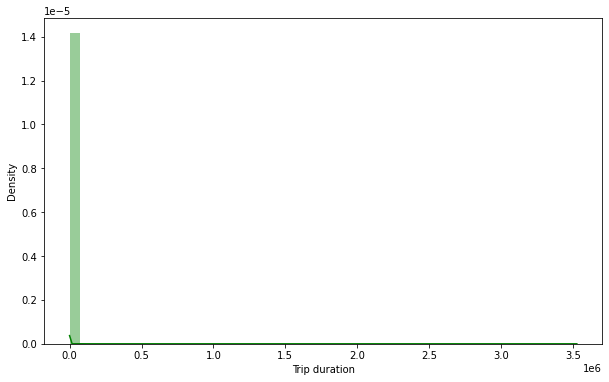

In [ ]:
# 'trip_duration' is a dependent variable
plt.figure(figsize=(10,6))
sns.distplot((taxi_data['trip_duration']), color = 'green')
plt.xlabel('Trip duration')
plt.show()


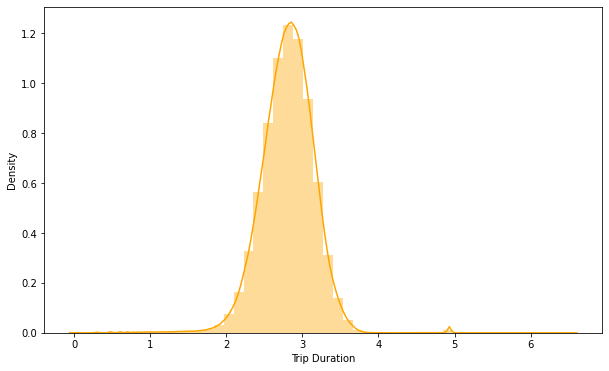

In [ ]:
# This shows right skewness, hence apply the log10 to transform it to the normal distribution
plt.figure(figsize=(10,6))
sns.distplot(np.log10(taxi_data['trip_duration']), color = 'orange')
plt.xlabel('Trip Duration')
plt.show()

The distribution of trip duration has been observed to be normal.

Plot the boxplot and check for Outliers

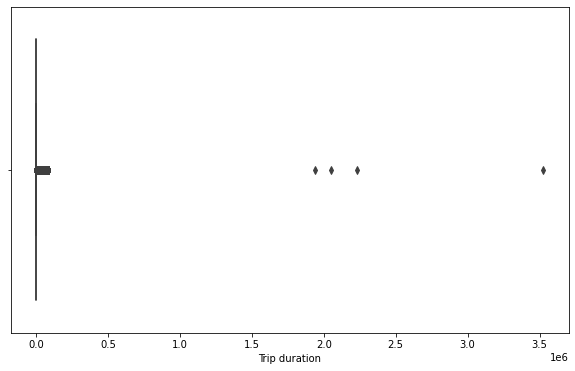

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(taxi_data['trip_duration'])
plt.xlabel('Trip duration')
plt.show()

There are outliers and they should be eliminated to ensure uniformity in the data.

In [ ]:
# checking for outliers and elinimating them
# Calculating 0-100 percentile to detect a correct percentile value for the removal of outlier
for i in range (0,100,10):
  duration = taxi_data['trip_duration'].values
  duration = np.sort(duration, axis = None)
  print("{} percentile value is {}".format(i, duration[int(len(duration)*(float(i)/100))]))
print("100 percentile value is ",duration[-1])  

0 percentile value is 1
10 percentile value is 245
20 percentile value is 348
30 percentile value is 446
40 percentile value is 548
50 percentile value is 662
60 percentile value is 798
70 percentile value is 968
80 percentile value is 1208
90 percentile value is 1634
100 percentile value is  3526282


In [ ]:
# some inconsistancy has been obseved in 90-100,
# we willfurther dig deep into 90-100 percentile to analyse the data and check for the outliers in order to overcome

for i in range(90,100):
  duration = taxi_data['trip_duration'].values
  duration = np.sort(duration, axis = None)
  print("{} percentile value is {} ".format(i, duration[int(len(duration)*(float(i)/100))]))
print("100 percentile value is ",duration[-1])

90 percentile value is 1634 
91 percentile value is 1703 
92 percentile value is 1780 
93 percentile value is 1869 
94 percentile value is 1975 
95 percentile value is 2104 
96 percentile value is 2273 
97 percentile value is 2497 
98 percentile value is 2829 
99 percentile value is 3440 
100 percentile value is  3526282


Visualization of Number of trips taken with respect to trip duration

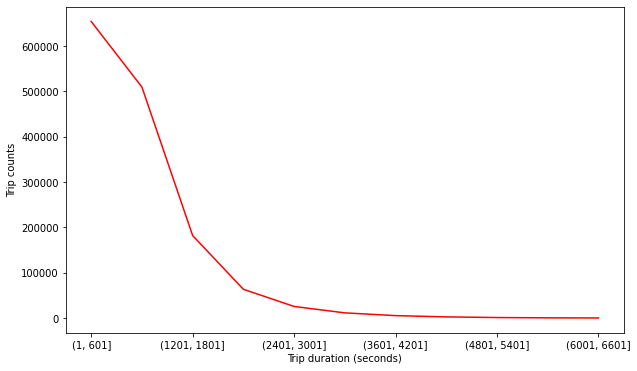

In [ ]:
# Visualisation of number of trips taken with respect to trip duration
plt.figure(figsize=(10,6))
taxi_data.trip_duration.groupby(pd.cut(taxi_data.trip_duration, np.arange(1,7200,600))).count().plot(kind='line',color ='red')
plt.xlabel("Trip duration (seconds)")
plt.ylabel("Trip counts")
plt.show()

As per the above observation, most of the trip duration is completed in 1 hour(3600 seconds).

As per the above observation a very few trips have duration more than 5000 seconds and some are with as low as 1 second(0 km distance)

In [ ]:
# to mentain the data consistancy we will remove these outliers
# (Trips with duration more than 5000 seconds and less than 60 seconds)
taxi_data = taxi_data[taxi_data.trip_duration <=5000]
taxi_data = taxi_data[taxi_data.trip_duration >=60]

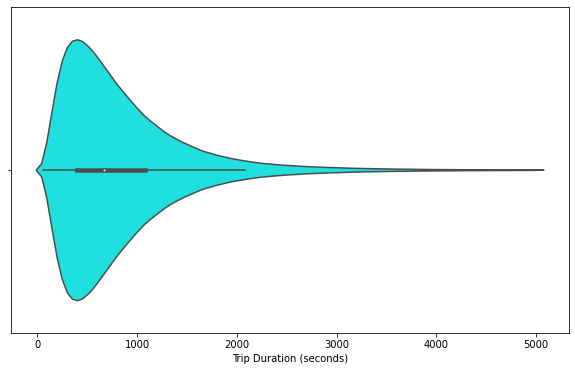

In [ ]:
# Plotting for insights
plt.figure(figsize = (10,6))
sns.violinplot(taxi_data.trip_duration, color = 'cyan')
plt.xlabel('Trip Duration (seconds)')
plt.show()

The majority of the trips took 10 to 20 minutes to complete. As seen, the majority of the trips finished in 0 to 30 minutes (1800 seconds)
Examine other variables as well

##Passenger count

Before analysing the passenger count, we are aware that a booked cab cannot have zero passengers or more than six passengers in a cab, thus it is time to define or eliminate the rows with these values.

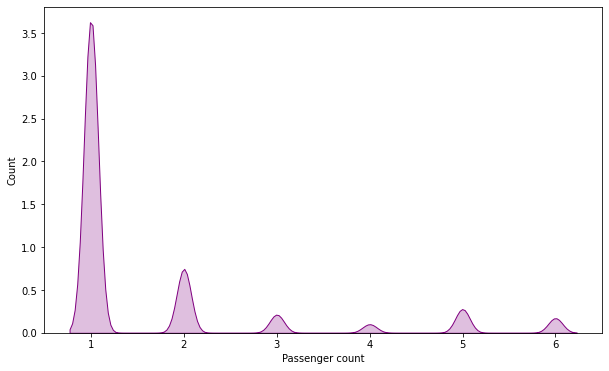

In [ ]:
# Assuming the passenger count . If any, removing the rows which have Zero(0) or more than 6 passengers count
taxi_data = taxi_data[taxi_data['passenger_count'] !=0]
taxi_data = taxi_data[taxi_data['passenger_count'] <=6]

#passenger count
plt.figure(figsize=(10,6))
sns.kdeplot(x = 'passenger_count', data = taxi_data, color ='purple', shade =True)
plt.xlabel('Passenger count')
plt.ylabel('Count')
plt.show()


According to the above observations, it should be highlighted that the majority of trips were taken by a single passenger, and that large groups of people travelling together is less common than single passengers.

## Slotwise trips per Day



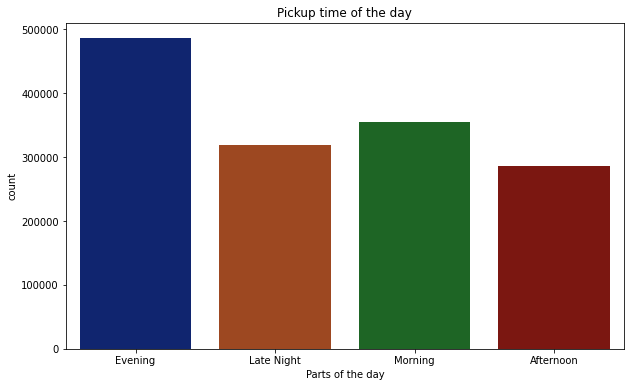

In [ ]:
# Trips per time slot
plt.figure(figsize=(10,6))
sns.countplot(x='Pickup_Time', data = taxi_data,  palette='dark')
plt.title('Pickup time of the day')
plt.xlabel('Parts of the day')
plt.ylabel('count')
plt.show()

Evenings are the busiest and top among  the all.

## Trips per week day

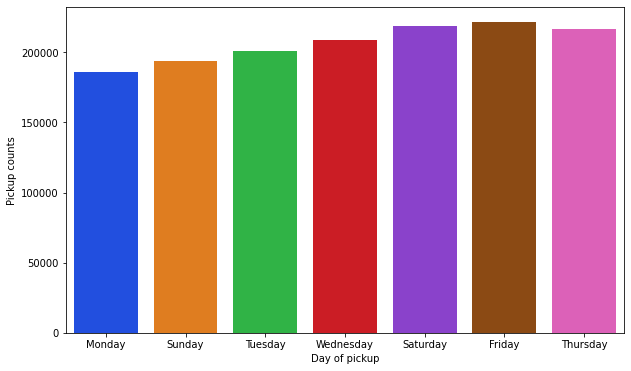

In [ ]:
# ANalysing the trips per week day
plt.figure(figsize=(10,6))
sns.countplot(taxi_data.pickup_day, palette='bright')
plt.xlabel("Day of pickup")
plt.ylabel("Pickup counts")
plt.show()

As shown above, Fridays are busiest, followed by Saturday, and this may be due to the weekend.

##  Trips per month

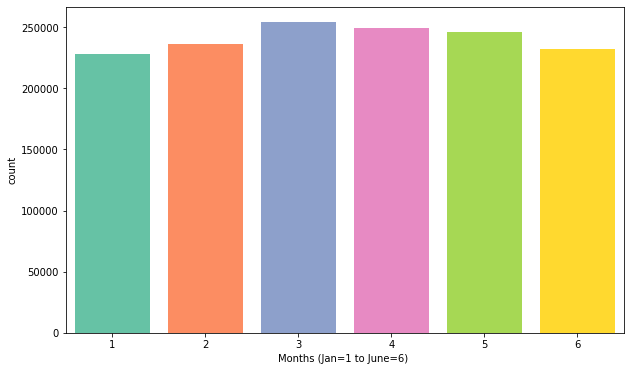

In [ ]:
# Analysing the trips per month
plt.figure(figsize=(10,6))
sns.countplot(taxi_data.pickup_month, palette='Set2', saturation = 1.8)
plt.xlabel('Months (Jan=1 to June=6) ')
plt.ylabel('count')
plt.show()

Not much of a change or no variation between months.

## Trips per hour

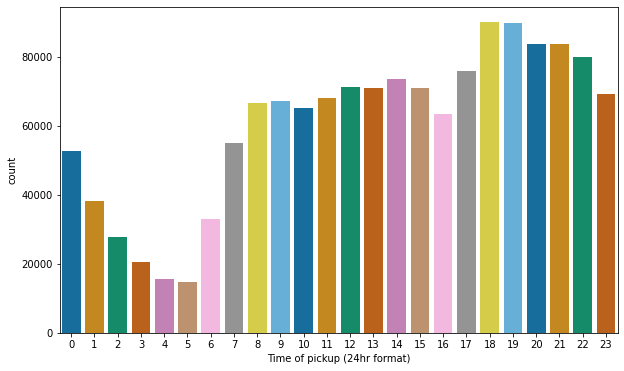

In [ ]:
# Analyzing the trips per hour
plt.figure(figsize = (10,6))
sns.countplot(taxi_data.Hour_of_Pickup, palette='colorblind')
plt.xlabel('Time of pickup (24hr format)')
plt.show()

6:00 pm to 7:00 pm were the busiest hours, which makes sense as this is the time for people to return home from school/work.



##Store and Forward Flag

In [ ]:
# Analysing the Store and Forward flag
taxi_data['store_and_fwd_flag'].value_counts(normalize = True)

N    0.994564
Y    0.005436
Name: store_and_fwd_flag, dtype: float64

According to the aforementioned observation, just 1% of the trip information was saved in the vehicle's memory prior to sending it to the server. This might have happened because of GPS or mobile device issues, a dead battery, or other factors.

##Distance

In [ ]:
# Analysing the Distance
taxi_data['distance'].value_counts()

0.000000    4216
0.000424       9
0.000848       5
0.000424       5
0.001273       3
            ... 
5.275778       1
3.343165       1
4.218078       1
8.860892       1
1.134044       1
Name: distance, Length: 1441998, dtype: int64

Let's have a look at the boxplot

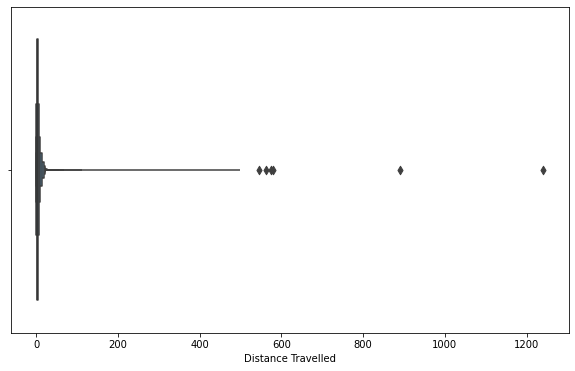

In [ ]:
plt.figure(figsize=(10,6))
sns.boxenplot(taxi_data.distance)
plt.xlabel("Distance Travelled")
plt.show()

*   There are some trips with over 100 km distance and some trips with 0 km distance.

The possible reasons for zero km trips can be:
*   The dropoff location couldn’t be tracked.
*   The passengers or driver cancelled the trip due to some issue or technical issue in software, etc.

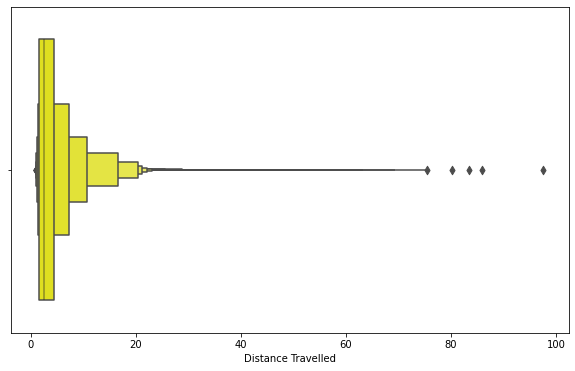

In [ ]:
# removing the outliers and updating the values
taxi_data = taxi_data[~(taxi_data.distance > 100)]
taxi_data = taxi_data[~(taxi_data.distance< 1)]

# Plotting the boxen plot
plt.figure(figsize=(10,6))
sns.boxenplot(taxi_data.distance, color= 'yellow')
plt.xlabel("Distance Travelled")
plt.show()

## Speed

In [ ]:
# Speed value counts
taxi_data['speed'].value_counts()

9.580937     2
11.856445    1
24.973027    1
12.398293    1
10.174207    1
            ..
19.711113    1
13.742299    1
8.855924     1
5.859784     1
20.618974    1
Name: speed, Length: 1209250, dtype: int64

In [ ]:
# Largest value of speed
taxi_data['speed'].nlargest(10)

693299     583.735137
1359910    564.208013
218935     520.505501
500725     424.861414
473439     356.616642
191997     318.580003
793555     270.595438
1328401    255.419847
176589     226.716083
656806     197.129414
Name: speed, dtype: float64

plotting the boxplot for better understanding

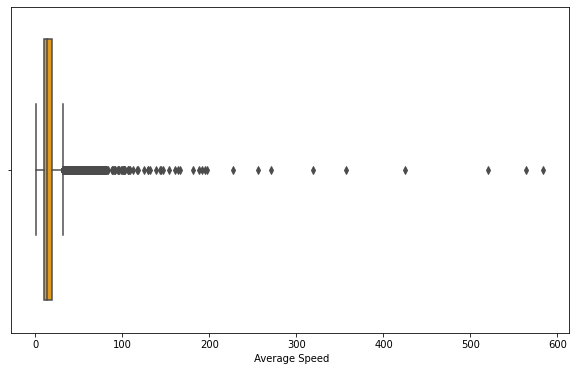

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(taxi_data.speed,color = 'orange')
plt.xlabel(" Average Speed")
plt.show()

*   Some trips were done at a speed of over 100 km/h.



As per the rule, the speed limit approx. 40km/h in New York City.
So having average speed of over 60km/h is quite unreasonable.

In [ ]:
# Average speed less than 60
taxi_data= taxi_data[~(taxi_data.speed > 60)]

In [ ]:
#Look at the smallest speed as well
print(taxi_data['speed'].nsmallest(10))

1165873    0.777462
24426      0.825900
1025910    0.877407
1440074    0.900916
1453671    0.913801
440689     0.954780
210725     0.962457
985326     0.988256
623249     0.991219
251672     0.998664
Name: speed, dtype: float64


Some observations showing that speeds which are less than 1 km/hr for a trip which is quite unreasonable.

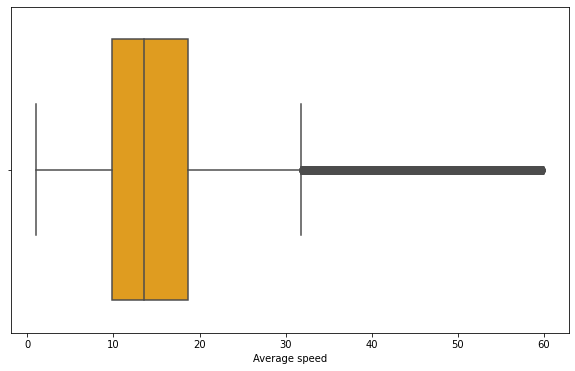

In [ ]:
#removing the data with less than 1km avg
taxi_data= taxi_data[~(taxi_data.speed < 1)]

# Plotting for boxplot
plt.figure(figsize=(10,6))
sns.boxplot(taxi_data.speed, color ='orange')
plt.xlabel("Average speed")
plt.show()

## Speed range distribution with the help of graph

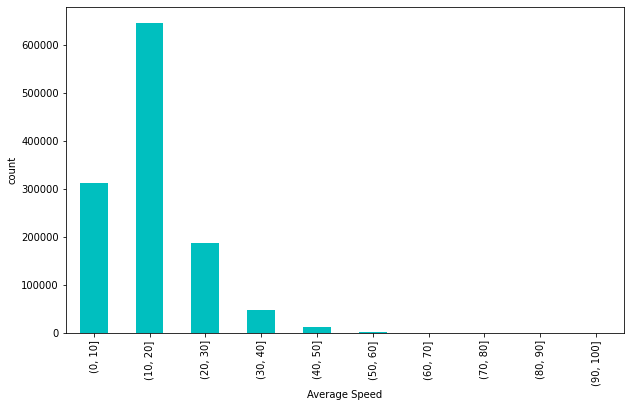

In [ ]:
# Speed range per trip count
plt.figure(figsize=(10,6))
taxi_data.speed.groupby(pd.cut(taxi_data.speed, np.arange(0,104,10))).count().plot(kind= 'bar',color='c')
plt.xlabel("Average Speed")
plt.ylabel("count")
plt.show()

*   Most of the trips are completed at a speed range of 10-20 km/h.



## Vendor Identifier

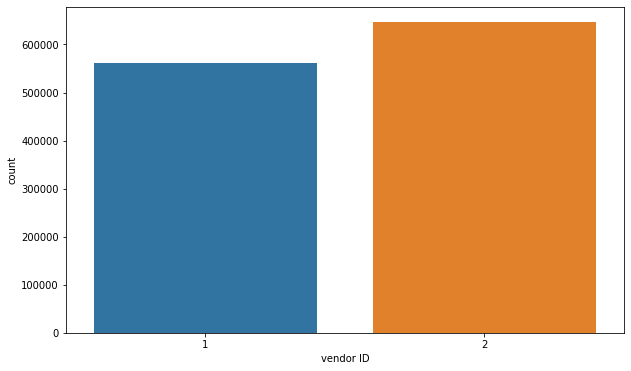

In [ ]:
# Analyse the Vendor_id variable
plt.figure(figsize=(10,6))
sns.countplot(taxi_data.vendor_id)
plt.xlabel('vendor ID')
plt.ylabel("count")
plt.show()

As shown above, there are not many differences between the trips taken by the two vendors.

# Bivariate Analysis

## Trip duration per month

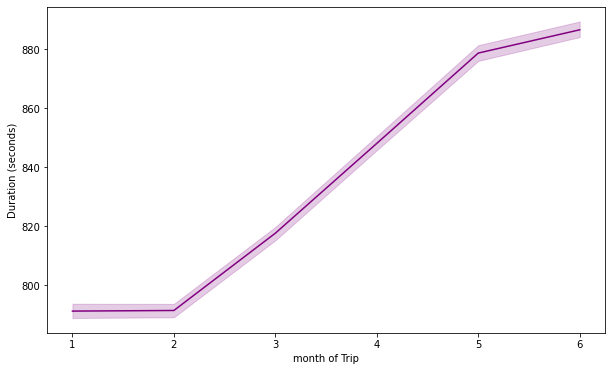

In [ ]:
# Analysing trip duration month
plt.figure(figsize=(10,6))
sns.lineplot(x='pickup_month', y ='trip_duration', data = taxi_data, color = 'purple')
plt.xlabel("month of Trip")
plt.ylabel("Duration (seconds)")
plt.show()

*   From February, we can see trip duration rising every month.
*   There might be some seasonal parameters like wind/rain which can be a factor of this gradual increase in trip duration over a period. 



## Trip duration per weekday

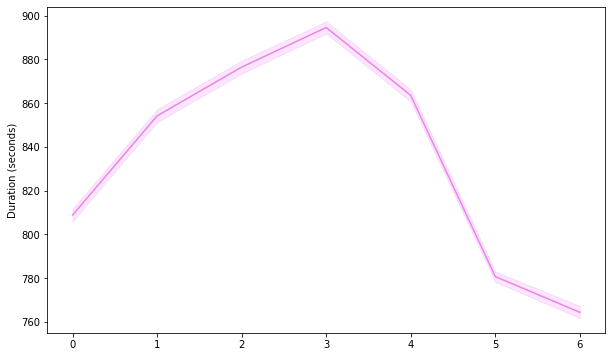

In [ ]:
plt.figure(figsize = (10,6))
sns.lineplot(x='Pickday_No',y='trip_duration',data=taxi_data, color = 'violet')
plt.xlabel('')
plt.ylabel('Duration (seconds)')
plt.show()

*   Trip duration on thursday is longest among all days.

## Trip Duration per hour

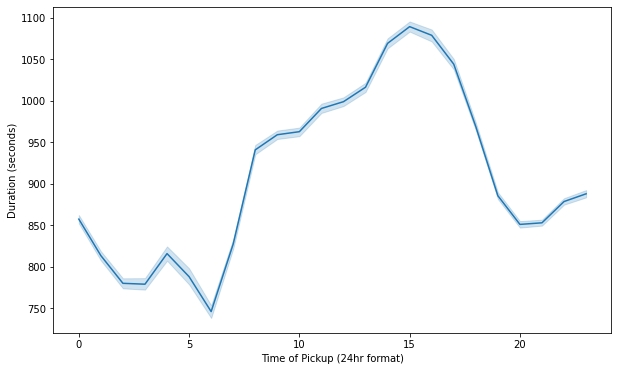

In [ ]:
# Plotting for hour of pickup, trip duration
plt.figure(figsize = (10,6))
sns.lineplot(x='Hour_of_Pickup',y='trip_duration',data=taxi_data)
plt.xlabel('Time of Pickup (24hr format)')
plt.ylabel('Duration (seconds)')
plt.show()

*   As per observation, trip duration is the maximum around 3 pm,traffic might be the reason.
*   Around 6 am trip duration is the lowest as the streets may not be busy.

## Trip Duration per Vendor

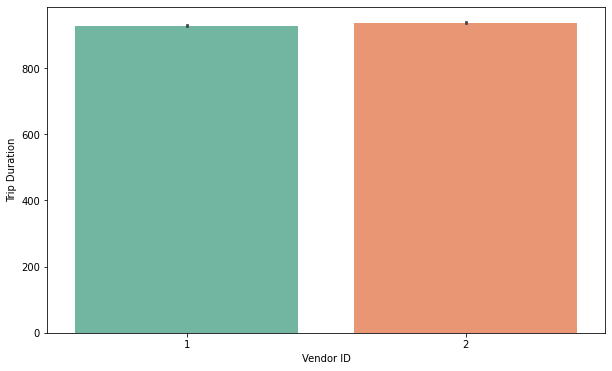

In [ ]:
#  Analysing trip duration per Vendor
plt.figure(figsize=(10,6))
sns.barplot(y='trip_duration', x = 'vendor_id', data = taxi_data, estimator=np.mean, palette='Set2')
plt.xlabel("Vendor ID")
plt.ylabel("Trip Duration")
plt.show()

Compared to vendor id 1, vendor id 2 takes  longer trips

## Trip Duration per Store and Forward Flag

<Figure size 720x432 with 0 Axes>

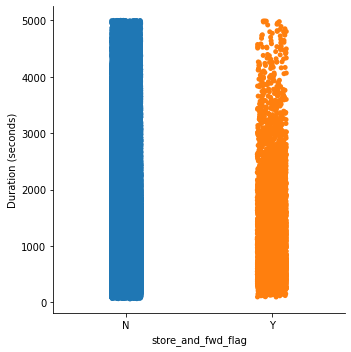

In [ ]:
# Analysing trip duration per Store and Forward Flag
plt.figure(figsize=(10,6))
sns.catplot(x='store_and_fwd_flag', y ='trip_duration', data = taxi_data, kind = 'strip')
plt.xlabel("store_and_fwd_flag")
plt.ylabel("Duration (seconds)")
plt.show()

There is not much difference between N and Y

## Distance and Month

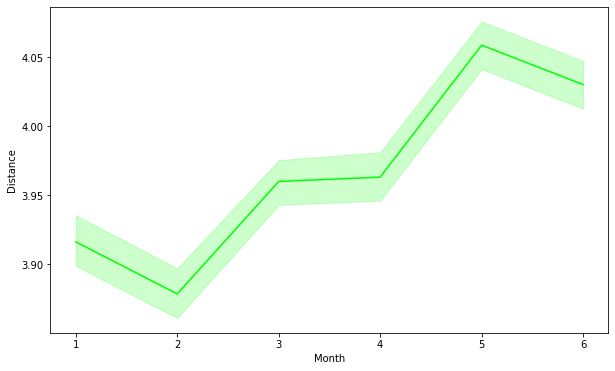

In [ ]:
# Distance per month
plt.figure(figsize=(10,6))
sns.lineplot(x= 'pickup_month', y = 'distance', data= taxi_data, color='lime')
plt.xlabel("Month")
plt.ylabel("Distance")
plt.show()

Trip distance is lowest in 2nd month and maximum in 5th month.



## Distance per Weekday

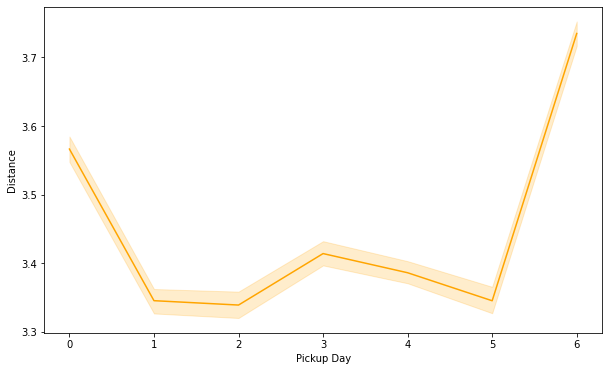

In [ ]:
# Analysing Distance per week day
plt.figure(figsize=(10,6))
sns.lineplot(x = 'Pickday_No', y = "distance", data = taxi_data, color = 'Orange')
plt.xlabel("Pickup Day")
plt.ylabel("Distance")
plt.show()

Fairly distributed with avg distance of 3.5km hour and sunday being the top, outstation trips or weekend trips may be the reason.

## Distance and Hour

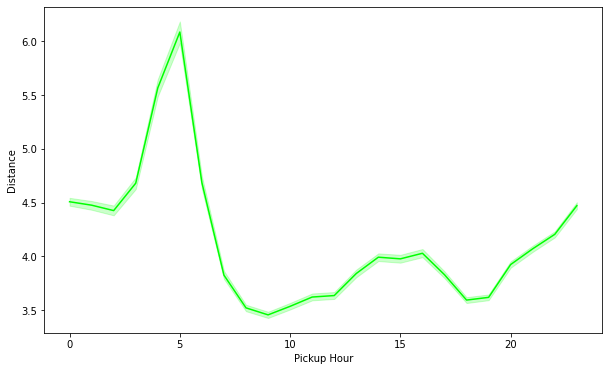

In [ ]:
# Plotting for distance to Hour
plt.figure(figsize=(10,6))
sns.lineplot(x ='Hour_of_Pickup', y = 'distance', data=taxi_data, color = 'lime')
plt.xlabel("Pickup Hour")
plt.ylabel("Distance")
plt.show()

It is fairly equal from morning till the evening varying around 3 - 3.5 kms.
Trip distance is highest during early morning hours.
It starts increasing gradually towards the late night hours starting from evening till 5 AM and decrease steeply towards morning.



## Distance and Trip Duration

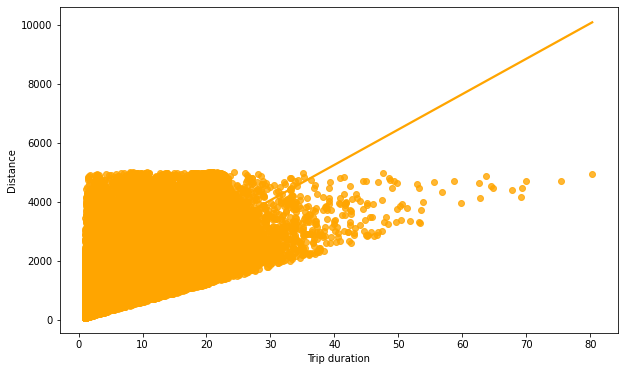

In [ ]:
# We should remove those trips which covered 0 km
taxi_data= taxi_data[~(taxi_data.distance==0)]

#Plotting graph for trip duration and distance
plt.figure(figsize=(10,6))
sns.regplot(taxi_data.distance, taxi_data.trip_duration, color='orange')
plt.xlabel('Trip duration')
plt.ylabel('Distance')
plt.show()


The straight line shows some linear relation between the two.

## Distance and Store Forward Flag

<Figure size 720x432 with 0 Axes>

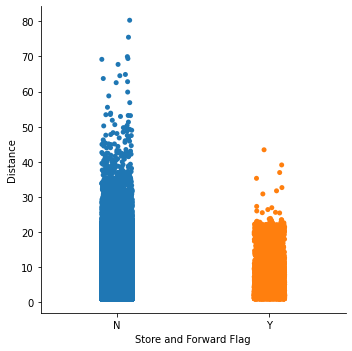

In [ ]:
# Analyse Distance to store forward flag
plt.figure(figsize=(10,6))
sns.catplot(y = 'distance', x= 'store_and_fwd_flag', data=taxi_data, kind= 'strip')
plt.xlabel('Store and Forward Flag')
plt.ylabel('Distance')
plt.show()

As observed for longer distances the trip is not stored.

## Distance and Vendor

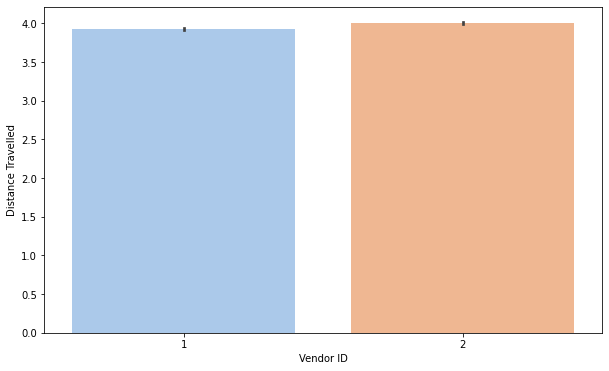

In [ ]:
# Comparing distance and vendor
plt.figure(figsize = (10,6))
sns.barplot(y='distance',x='vendor_id',data=taxi_data,estimator=np.mean, palette='pastel')
plt.ylabel('Distance Travelled')
plt.xlabel('Vendor ID')
plt.show()

As shown in above, Similar distribution has been observed btw both the vendors



# Feature Engineering

## One Hot Encoding

Features like 'store_and_fwd_flag', and 'pickup_day' are dummified.

In [ ]:
# Dummifying the features
dummy = pd.get_dummies(taxi_data.store_and_fwd_flag, prefix= 'store_and_fwd_flag')
taxi_data = pd.concat([taxi_data,dummy] , axis = 1)

dummy = pd.get_dummies(taxi_data.pickup_day, prefix='pickup_day', drop_first=True)
taxi_data = pd.concat([taxi_data,dummy], axis = 1,)

In [ ]:
# Trip durtion in hours
taxi_data['trip_duration_hour'] = taxi_data['trip_duration']/3600

In [ ]:
# Removing the Variables which are not necessary for further analysis
taxi_data= taxi_data.drop(['id', 'pickup_datetime','dropoff_datetime','store_and_fwd_flag','pickup_day','dropoff_day','Pickday_No','Pickup_Time','trip_duration','speed'], axis =1)
taxi_data.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Hour_of_Pickup,pickup_month,distance,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_day_Monday,pickup_day_Saturday,pickup_day_Sunday,pickup_day_Thursday,pickup_day_Tuesday,pickup_day_Wednesday,trip_duration_hour
0,2,1,-73.982155,40.767937,-73.964630,40.765602,17,3,1.498523,1,0,1,0,0,0,0,0,0.126389
1,1,1,-73.980415,40.738564,-73.999481,40.731152,0,6,1.805510,1,0,0,0,1,0,0,0,0.184167
2,2,1,-73.979027,40.763939,-74.005333,40.710087,11,1,6.385108,1,0,0,0,0,0,1,0,0.590000
3,2,1,-74.010040,40.719971,-74.012268,40.706718,19,4,1.485501,1,0,0,0,0,0,0,1,0.119167
4,2,1,-73.973053,40.793209,-73.972923,40.782520,13,3,1.188590,1,0,0,1,0,0,0,0,0.120833


In [ ]:
# Information of data
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1208841 entries, 0 to 1458643
Data columns (total 18 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   vendor_id             1208841 non-null  int64  
 1   passenger_count       1208841 non-null  int64  
 2   pickup_longitude      1208841 non-null  float64
 3   pickup_latitude       1208841 non-null  float64
 4   dropoff_longitude     1208841 non-null  float64
 5   dropoff_latitude      1208841 non-null  float64
 6   Hour_of_Pickup        1208841 non-null  int64  
 7   pickup_month          1208841 non-null  int64  
 8   distance              1208841 non-null  float64
 9   store_and_fwd_flag_N  1208841 non-null  uint8  
 10  store_and_fwd_flag_Y  1208841 non-null  uint8  
 11  pickup_day_Monday     1208841 non-null  uint8  
 12  pickup_day_Saturday   1208841 non-null  uint8  
 13  pickup_day_Sunday     1208841 non-null  uint8  
 14  pickup_day_Thursday   1208841 non-

In [ ]:
taxi_data.shape

(1208841, 18)

In [ ]:
# Checking for NULL /NAN values
taxi_data.isnull().sum()

vendor_id               0
passenger_count         0
pickup_longitude        0
pickup_latitude         0
dropoff_longitude       0
dropoff_latitude        0
Hour_of_Pickup          0
pickup_month            0
distance                0
store_and_fwd_flag_N    0
store_and_fwd_flag_Y    0
pickup_day_Monday       0
pickup_day_Saturday     0
pickup_day_Sunday       0
pickup_day_Thursday     0
pickup_day_Tuesday      0
pickup_day_Wednesday    0
trip_duration_hour      0
dtype: int64

NAN/NULL values are not present